# Predicting the Quality of Red Wine

    The Aim of this notebook is to predict the quality of red wine. The data provided has 11 variables from Physicochemical test and also the quality for different compositions of red variant of the Portuguese "Vinho Verde" wine.

# Importing Libraries and Reading data

In [1]:
#importing the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

#reading the data
WData=pd.read_csv("winequality-red.csv")


# Data Explorations

    Now we can start to see how the data is arranged, what are the dimensions and decide how we can proceed!

In [2]:
#Is the data structured?

#What is the structure?
print(WData.shape)
#Now, what are the columns present?
print(WData.columns)
#Any information about data present?
print(WData.info())

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


    We now notice that the number of records is 1599 and the number of columns is 12. We find that we donot have null value at all,so no need to clean the dataset! 

In [3]:
#Any Description?
print(WData.describe())
#Lets see some first few records
WData.head()

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


        Comparing the 75 percentile value and corresponding 100 percentile value(max) of residual sugar,chlorides, free sulfur dioxide and total sulphur dioxide. 
        So lets take a subset of these values and analyze

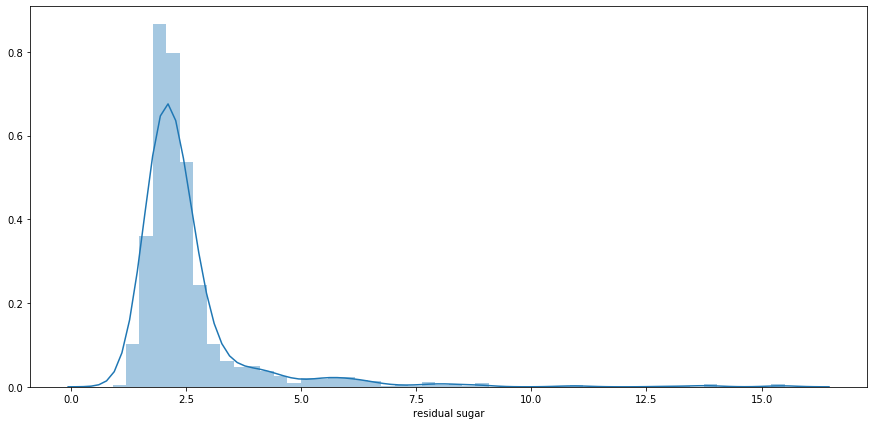

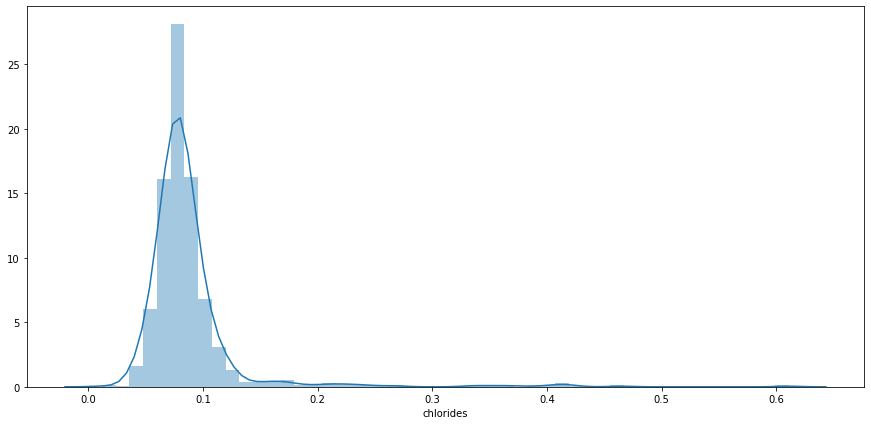

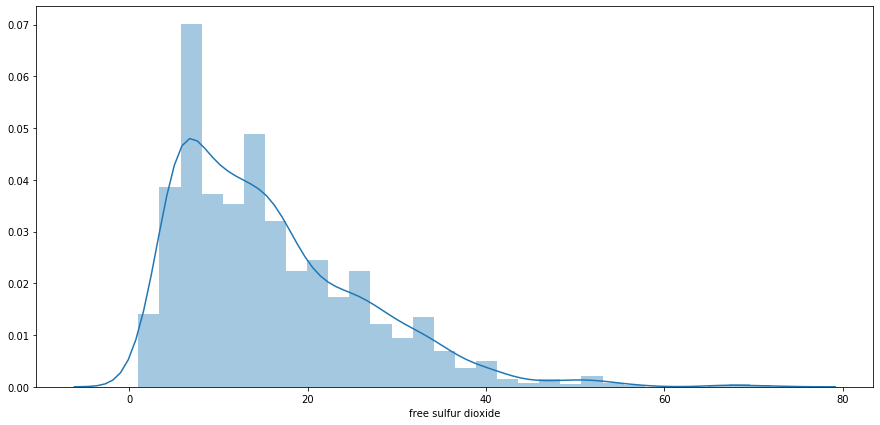

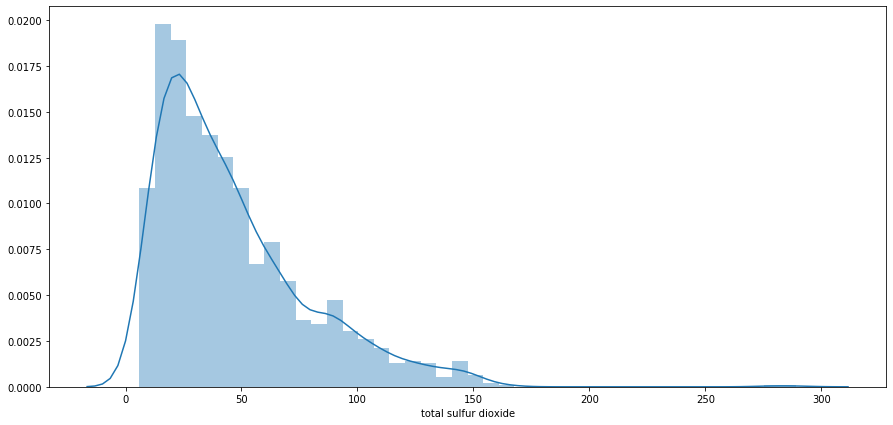

In [4]:
# Exploring the subset
#Histogram of suspicious columns


anom_col =['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide']
anom = [WData[x] for x in anom_col]

for a in anom:
    plt.figure(figsize=(15,7))
    sns.distplot(a)
    plt.show()


    From the Figure we see there is a long tails to these data. We now index the data which are 6 times the mean.

In [5]:
def anom_ind(col):
    return(col[col>6*pd.Series.mean(col)].index)


index_to_remove=list(map(anom_ind,anom)) #it is in list of map form
#lets convert it into a single list
index_n=[x for sublist in index_to_remove for x in list(sublist)]

print(index_n)     

[480, 1434, 1435, 151, 258, 1081]


    We find that there are 6 records that have anomalous value, so lets remove them..

In [6]:
# removing anomalous records
WData=WData.drop(index_n)

WData.shape
# Note: Do not execute this cell more than once, else another 6 records will be removed!

(1593, 12)

In [7]:
#Now lets see how the dataset looks
WData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,8.315945,0.528183,0.269755,2.510829,0.086686,15.813245,46.256121,0.996735,3.312103,0.656880,10.425643,5.636535
std,1.741919,0.179173,0.193594,1.288264,0.043105,10.360651,32.335154,0.001865,0.153551,0.165684,1.064382,0.806909
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996740,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,13.900000,0.467000,72.000000,278.000000,1.003200,4.010000,1.980000,14.900000,8.000000


# Data Visualization and Manipulation

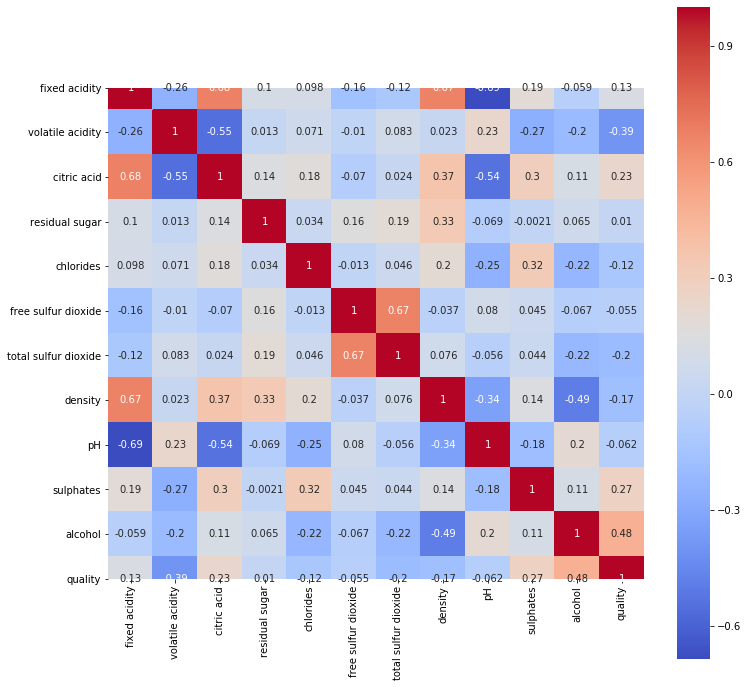

In [8]:
#correlation matrix
Corr_matrix=WData.corr()
plt.figure(figsize=(12,12))
sns.heatmap(Corr_matrix,square=True,annot=True,cmap='coolwarm')

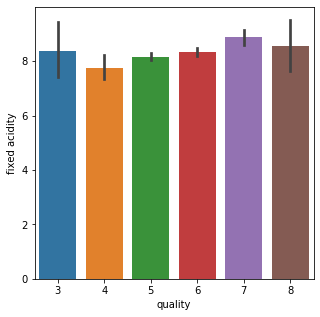

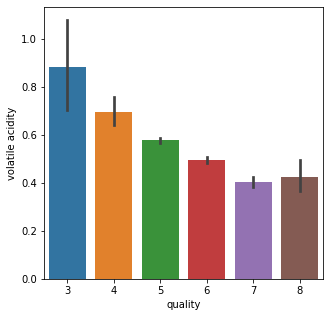

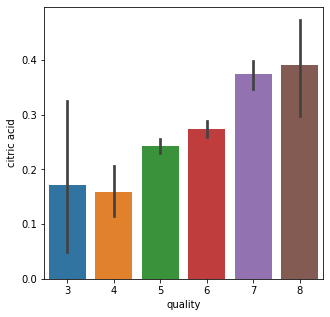

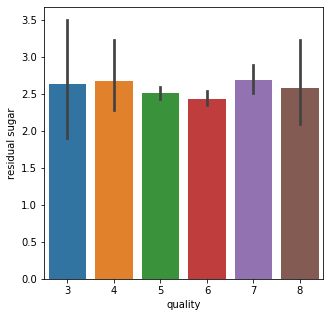

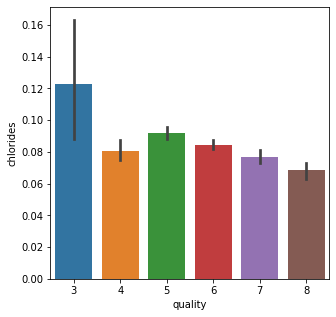

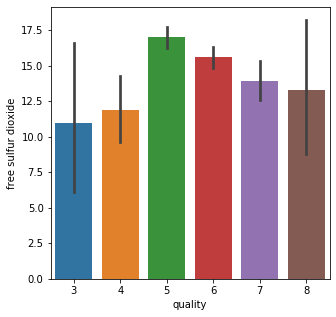

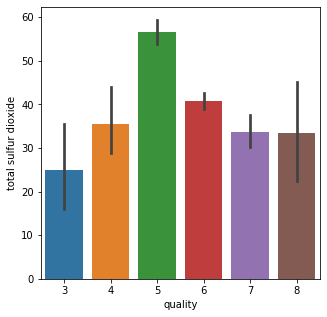

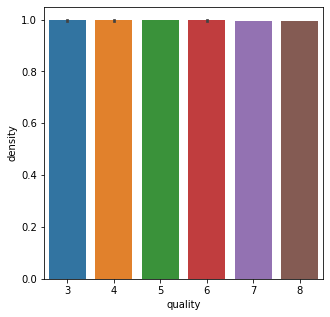

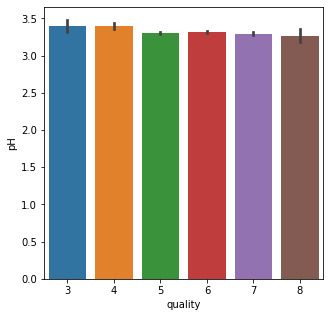

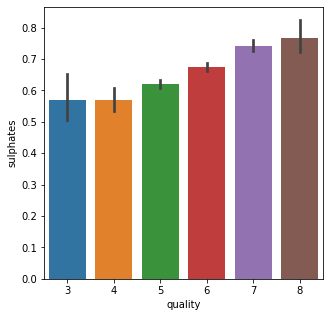

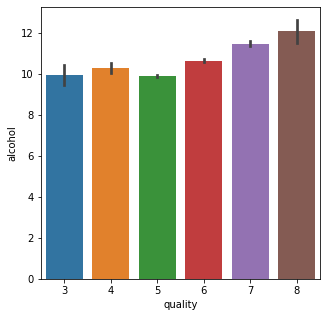

In [9]:
#bar plot
column=list(WData) #This creates list of strings containing the column names
for i in column:
    if i!=column[-1]:
        plt.subplots(figsize=(5,5))
        sns.barplot(x=column[-1],y=i,data=WData)

    

    From the correlation graph we find 'fixed acidity','residual sugar','free sulfur dioxide','pH' donot have significant correlations with 'quality'. But note that
    'fixed acidity' has a strong correlation with 'citric acid' and 'density' which have significant correlation with 'quality'.
    similarly 'residual sugar' has strong correlation with density, 'free sulfur dioxide' with 'total sulfur dioxide' and 'pH' has good correlation with citric acid.
    So we take all the columns to predict the model.
    Here we see that the dataset is well structured and well cleaned.

# Linear regression analysis

    We can do our Linear regression analysis and predict the wine quality. We can perform Decision Tree Regression with Sci-kit learn.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X=WData.drop(['quality'],axis=1)
y=WData['quality'] #target varible - quality of wine

#Splitting data for testing and training
train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=1)

#building model
model=DecisionTreeRegressor(random_state=1)

In [11]:
#model fitting
model.fit(train_X,train_y)

#target prediction
val_predicted=model.predict(val_X)

#Lets look at the rows of predicted values
print(val_predicted)

#first few rows of actual value
print(val_y.head())

[5. 6. 7. 5. 6. 5. 5. 5. 5. 6. 5. 6. 5. 5. 6. 5. 7. 7. 5. 4. 5. 6. 5. 6.
 5. 6. 6. 7. 5. 6. 5. 5. 7. 7. 5. 6. 6. 5. 5. 7. 7. 4. 5. 5. 5. 5. 6. 6.
 6. 5. 5. 6. 5. 5. 5. 5. 5. 5. 7. 5. 7. 7. 5. 5. 5. 6. 7. 5. 4. 5. 6. 4.
 6. 6. 5. 5. 6. 7. 5. 5. 6. 6. 6. 5. 6. 6. 5. 5. 5. 5. 5. 5. 4. 6. 5. 6.
 7. 6. 7. 5. 5. 5. 5. 6. 5. 6. 6. 6. 5. 6. 7. 5. 7. 6. 6. 5. 7. 6. 5. 6.
 6. 6. 5. 7. 4. 5. 5. 6. 5. 6. 5. 6. 6. 5. 7. 7. 7. 5. 4. 5. 6. 5. 5. 5.
 6. 5. 6. 5. 7. 6. 5. 6. 6. 6. 7. 6. 6. 5. 5. 6. 5. 5. 5. 6. 5. 6. 6. 7.
 5. 5. 5. 5. 5. 6. 7. 6. 7. 5. 6. 5. 6. 7. 7. 6. 6. 6. 5. 6. 5. 5. 5. 6.
 7. 6. 6. 6. 5. 7. 5. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5. 5. 6. 5. 7. 5. 5.
 6. 5. 6. 5. 7. 5. 6. 6. 5. 7. 5. 5. 7. 6. 5. 6. 6. 5. 6. 7. 5. 5. 5. 7.
 5. 5. 6. 7. 6. 5. 5. 5. 5. 6. 5. 5. 6. 5. 6. 6. 5. 6. 5. 6. 6. 5. 6. 5.
 6. 6. 5. 5. 7. 5. 7. 5. 6. 6. 5. 7. 6. 6. 6. 5. 5. 7. 6. 5. 5. 5. 5. 5.
 6. 6. 6. 4. 7. 5. 6. 5. 5. 6. 6. 5. 5. 5. 7. 5. 5. 6. 5. 7. 5. 7. 5. 6.
 6. 6. 5. 5. 7. 6. 7. 5. 6. 6. 5. 5. 5. 5. 6. 6. 3.

In [12]:
#Lets calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
val_mae =mean_absolute_error(val_y,val_predicted)
val_rmse=sqrt(mean_squared_error(y_true=val_y,y_pred=val_predicted))
print('Mean Absolut Error:',val_mae)
print('Root Mean Square Error:',val_rmse)

Mean Absolut Error: 0.46365914786967416
Root Mean Square Error: 0.7641726897432107


In [13]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(train_X,train_y)
val_predicted_lr=lr_model.predict(val_X)
print(val_predicted_lr)
print(val_y)
lr_val_mae = mean_absolute_error(val_predicted_lr,val_y)
lr_val_rmse=sqrt(mean_squared_error(y_true=val_y,y_pred=val_predicted_lr))
print('Mean Absolut Error:',lr_val_mae)
print('Root Mean Square Error:',lr_val_rmse)

[5.57919874 5.24001414 5.87289258 5.75002715 5.867974   5.7140756
 5.90851213 5.98759364 5.45726662 6.38611015 5.34075361 4.87652591
 5.35641121 5.59642892 6.2900939  5.32784459 6.01956795 5.74758875
 5.80366604 5.14940893 4.97768503 5.74694276 5.96935635 5.22905781
 5.07347364 6.23428652 6.05961051 6.38110319 5.06602353 5.38872769
 6.01009352 5.35531714 5.68087545 6.53277347 5.60192926 5.90509449
 6.52936165 5.31622863 5.08612601 6.36737298 5.2988496  5.77382755
 6.18053116 5.34075361 6.23258582 5.42150667 6.55844241 5.12268394
 5.10920741 4.92414721 5.35386592 5.43821377 4.97886239 4.59945157
 5.20449693 5.27294918 4.96248754 4.99812087 6.23186518 5.23344124
 6.42918655 6.06210317 4.94391631 5.55112973 5.40683811 5.25922768
 6.12532943 5.54878893 5.74652676 5.36496839 6.80494801 5.00750968
 5.6475554  6.07557641 5.37464667 4.95338794 5.90511215 6.68899748
 5.45523446 5.24910552 6.04129246 5.56757246 5.91816245 5.75819422
 5.38857915 5.54023169 5.29141353 5.5790994  5.02594766 5.01574

# Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X,train_y)
val_predicted_rf=rf_model.predict(val_X)
print(val_predicted_rf)
print(val_y.head())
rf_val_mae = mean_absolute_error(val_predicted_rf,val_y)
rf_val_rmse=sqrt(mean_squared_error(y_true=val_y,y_pred=val_predicted_rf))
print('Mean Absolut Error:',rf_val_mae)
print('Root Mean Square Error:',rf_val_rmse)

[5.3 5.9 5.5 5.1 5.3 5.7 5.4 6.3 5.3 6.4 5.1 5.5 5.  5.6 6.2 5.6 5.3 5.5
 5.5 4.5 5.  6.2 5.8 5.9 4.9 6.3 6.1 6.6 4.8 5.8 5.8 5.6 6.7 6.5 5.8 6.1
 6.1 5.2 5.2 6.5 5.5 4.8 6.  5.1 5.3 5.1 6.4 5.4 5.3 4.4 5.2 5.3 5.4 5.
 5.1 5.2 5.1 5.4 6.2 5.  6.6 6.2 5.2 5.1 5.1 5.7 6.2 5.3 5.7 5.2 7.1 5.
 6.  6.2 5.1 5.  5.8 6.6 5.3 4.8 6.3 5.5 6.  5.2 5.8 5.2 5.1 5.7 4.9 4.9
 5.  5.2 5.  5.9 5.3 6.1 6.9 6.3 6.2 5.8 5.1 5.4 5.4 5.7 5.  5.7 5.6 5.7
 5.1 5.5 6.1 5.2 6.8 6.1 6.4 4.9 6.7 5.  5.  5.7 5.3 6.1 5.1 6.5 5.6 5.2
 4.9 5.6 5.2 5.7 5.6 6.  5.9 5.  6.2 6.1 5.8 5.  5.  5.2 5.7 5.8 5.9 5.3
 5.9 5.8 5.4 4.9 6.5 5.8 5.4 6.2 5.2 6.  5.8 6.  6.  5.1 5.5 6.2 5.5 5.1
 5.4 5.5 5.4 6.3 5.9 5.4 5.1 6.5 5.  5.5 5.1 5.5 5.7 5.6 7.  5.2 6.  5.
 4.9 7.  6.4 6.2 6.2 5.7 5.3 5.4 5.1 5.2 5.1 5.4 6.6 5.3 6.  6.5 4.6 6.8
 5.8 5.2 5.2 5.7 5.6 5.8 5.7 5.9 6.1 5.6 5.8 5.5 5.  5.7 5.6 6.  5.3 5.1
 5.9 5.3 5.8 5.1 6.7 5.3 5.8 6.5 4.9 6.  5.3 4.9 6.7 6.8 5.6 6.1 5.  5.4
 6.5 6.6 5.2 5.3 5.  5.8 5.6 4.7 5.5 5.5 5.5 5.7 4.8 5

/home/viswanathan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Principal Component Analysis

    We can 

In [15]:
#standardization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Text(0, 0.5, 'Cumulative explained variance')

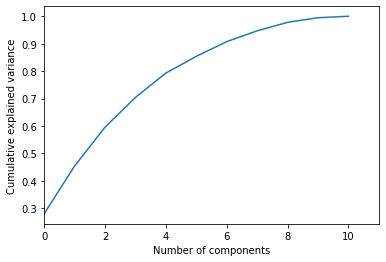

In [16]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,11,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

    Here note almost 7 components are enough to significant to do analysis, since it covers 90% of the information


In [17]:
sklearn_pca = PCA(n_components=7)
X_sk = sklearn_pca.fit_transform(X_std)
print(X_sk)

[[-1.60717549  0.46131996 -1.76821387 ...  0.01599043 -0.97374253
  -0.02240125]
 [-0.83179678  1.89197078 -0.86416923 ...  0.10027886  0.73063069
  -1.19421431]
 [-0.74920239  0.9169557  -1.15987311 ...  0.01958158  0.27013469
  -0.64303367]
 ...
 [-1.48155967  0.22814247  1.1283429  ...  0.19861646 -0.50515194
  -0.15591348]
 [-2.31699566  0.89038677  0.64683453 ...  0.06844401 -0.87298694
  -0.16665713]
 [-0.41785055 -0.60469045  1.63615794 ...  0.44460294 -0.28775039
   1.28299204]]


    we have reduced the number of features from 11 to 7 and we can perform the above three models.

In [18]:
#Splitting the data
train_X,val_X,train_y,val_y=train_test_split(X_sk,y,random_state=1)

In [19]:
#Decision Tree regressor
dt_pca_model=DecisionTreeRegressor(random_state=1)
dt_pca_model.fit(train_X,train_y)
val_predicted=dt_pca_model.predict(val_X)
val_mae =mean_absolute_error(val_y,val_predicted)
val_rmse=sqrt(mean_squared_error(y_true=val_y,y_pred=val_predicted))
print('Mean Absolut Error:',val_mae)
print('Root Mean Square Error:',val_rmse)

Mean Absolut Error: 0.40100250626566414
Root Mean Square Error: 0.7391656883182331


In [20]:
#Linear regression
pca_lr_model=LinearRegression()
pca_lr_model.fit(train_X,train_y)
val_predicted_lr=pca_lr_model.predict(val_X)
lr_val_mae = mean_absolute_error(val_predicted_lr,val_y)
lr_val_rmse=sqrt(mean_squared_error(y_true=val_y,y_pred=val_predicted_lr))
print('Mean Absolut Error:',lr_val_mae)
print('Root Mean Square Error:',lr_val_rmse)

Mean Absolut Error: 0.47144208753342964
Root Mean Square Error: 0.6132444832858851


In [21]:
#random forest
pca_rf_model = RandomForestRegressor(random_state=1)
pca_rf_model.fit(train_X,train_y)
val_predicted_rf=pca_rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_predicted_rf,val_y)
rf_val_rmse=sqrt(mean_squared_error(y_true=val_y,y_pred=val_predicted_rf))
print('Mean Absolut Error:',rf_val_mae)
print('Root Mean Square Error:',rf_val_rmse)

Mean Absolut Error: 0.41453634085213026
Root Mean Square Error: 0.5886989179878795


/home/viswanathan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Conclusions


    1) Data has been cleaned for anomolous values
    2) Decision tree regression, linear regression and random forest regression has been performed and analyzed
    3) Principal Component analysis (PCA) was performed and the above models were run for the same.

    We find that PCA significantly improved the Decision tree regression model but it did not improve the performance of the other two models.
    We also see that Random forest regressor was giving better prediction with Root mean Square Error of 0.5657 (without PCA)